In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

n = len(np.arange(0, 1, 0.05))
K = np.zeros((125 * 125))
iterr = 0

def MAP_Elite(n_legs, iterr):
   
    P2 = np.zeros((5**(int(n_legs/2)), 5**(int(n_legs/2))))

    P = P2
    C = np.zeros((5**(int(n_legs/2)), 5**(int(n_legs/2))))
    
    #There are 6 parameters for each leg (i1 , i2 , i1 , i2 , i1 ,i2 ), 
    #therefore each controller is fully described by 36 parameters.
    # Each parameter can have one of these possible values: 0, 0.05, 0.1, ... 0.95, 1.

    for i in range(1, 1000):
        stop = 0
        iterr += i
        if (i < 40):
            c_prim = random_controller_v2()
        else:
            c = random_selec(C)
            c_prim = random_var_v2(c)
        for j in range(125*125):
            if(K[j] == c_prim and stop == 0):
                stop = 1
        if(stop == 0):
            X = behaviour_descr(simulation(c_prim))
            x_prim_leg_1, x_prim_leg_2 = int(X[0]), int(X[1]) 
            p_prim = performance(simulation(c_prim))
            #print(int(x_prim_leg_1))
            if(P[x_prim_leg_1][x_prim_leg_2] < p_prim):
                P[x_prim_leg_1][x_prim_leg_2] = p_prim  
                C[x_prim_leg_1][x_prim_leg_2] = c_prim
        #heat_map = sns.heatmap(Perf, cmap="YlGnBu")
    
    return P, C


def random_controller():
    rand_array = np.arange(0, 1, 0.05)
    controller = np.zeros((5 * 5 * 5, 5 * 5 * 5))
    proba = np.empty(rand_array.size)
    proba.fill(0.05)
    #index = np.random.choice(0, 1)
    #print(contr1[2])
    #contr2 = np.zeros([6, 6])
    #controller = [[contr1, contr2], [contr2, contr1]]
    for i in range(6): #number of legs
        seq = np.random.choice(rand_array, 6, replace = False, p = proba)
        for j in range(6): #number of controllers
            controller[j][i] = seq[j]
    return controller

def random_controller_v2():
    #n = len(np.arange(0, 1, 0.05))

    n = len(np.arange(0, 1, 0.05))
    X_controller = random.randint(0, n**24)   #with only 4 parameters (2 DOF)
    #X_controller = np.random.choice(np.arange(0, n**36))
    
    #indexX = np.random.choice(np.arange(0, 125))
    #indexY = np.random.chocie(np.arange(0, 125))
    
    #X[0] = 25*np.floor_divide(x_leg[0], 5) + 5*np.floor_divide(x_leg[2], 5) + np.floor_divide(x_leg[4], 5)
    #X[1] = 25*np.floor_divide(x_leg[1], 5) + 5*np.floor_divide(x_leg[3], 5) + np.floor_divide(x_leg[5], 5)
    return X_controller

def random_selec(C):
    selected_controller = C[np.random.choice(np.arange(0, len(C[0]) - 1))][np.random.choice(np.arange(0, len(C[0]) - 1))]
    return selected_controller

def random_var(control):
    index = np.random.rand([0, len(contr) - 1])
    for i in range(len(control)):
        if(index + 1 < len(contr)):
            control[i][index], control[i][index + 1] = control[i][index + 1], control[i][index] 
        else :
            control[i][index], control[i][index - 1] = control[i][index - 1], control[i][index] 
    return control

def random_var_v2(control):
    n = len(np.arange(0, 1, 0.05))
    #X_controller = random.randint(0, n**24)   #with only 4 parameters (2 DOF)
    index = np.random.choice(np.arange(0, 125))
    rand_array = np.arange(0, 1, 0.05)
    #controller = np.zeros([6, 6])
    proba = np.empty(rand_array.size)
    proba.fill(0.05)
    #for i in range(125):
    if(control < n**24 - n**2) :
        control += n**2
    else :
        control -= n**2
    return control

def simulation(c_prim):   # simulation of mouvement with chosen controller of 4 parameters for each leg
    
    T = 1000 #secondes, simulation time
    contact = [0, 1]
    legs = 6
        #p = 1.5 * np.random.randn(1000) + 2   # normal distribution centered in 2 with sigma = 1.5
        #p = np.random.exponential(size=1000)   #exponential distribution
    on_ground = np.zeros((T,legs))
    for i in range(legs):
        r = np.random.choice(np.arange(0, 3, 0.5))
        k = np.random.choice(np.arange(0, 1, 0.5))
        p = np.random.exponential(size=1000)   #exponential distribution
        p_norm = k * np.random.randn(1000) + r
        if (c_prim % 3 == 0):
            for j in range(T):
                r = np.random.choice(np.arange(0, 1, 0.5))
                    #on_ground[j][i] = np.random.choice(contact, 1, replace=True, p = [0.05, 0.95])
                if(p[j] > p_norm[j]):
                    on_ground[j][i] = 1
                else :
                    on_ground[j][i] = 0
        else :
            for j in range(T):
                r = np.random.choice(np.arange(0, 1, 0.5))
                    #on_ground[j][i] = np.random.choice(contact, 1, replace=True, p = [0.05, 0.95])
                if(p[j] > p_norm[j]):
                    on_ground[j][i] = 0
                else :
                    on_ground[j][i] = 1
            
    K[iterr] = c_prim
    
    return on_ground

def behaviour_descr(on_ground):    # Proportion of time of each leg on the ground
    # 1 : contact
    # 0 : no contact
    # The result is 6 Boolean time series (Ci for the ith leg).
    legs = len(on_ground[1])
    x_leg = np.zeros(legs)
    X = np.zeros(2)    # coordinate we are looking for
    #x2 = np.zeros(legs)
    T = 1000   
    #print(on_ground)
    for j in range(legs):
        for i in range(T):
            x_leg[j] += on_ground[i][j]
            #print(x[j])
    
    x_leg /= 1000
    #print(x_leg[0])
    
    for j in range(legs):
        #x_leg[j] = np.round(x_leg[j], 2)
        if(x_leg[j] < 0.10):
            x_leg[j] = 0
            #k = 0
        elif(x_leg[j] < 0.35):
            x_leg[j] = 0.25
            #k = 1
        elif(x_leg[j] < 0.65):
            x_leg[j] = 0.50
        elif(x_leg[j] < 0.85):
            x_leg[j] = 0.75
        else :
            x_leg[j] = 1.0
    #print('After interrations: ', x_leg[0])
    
    #X[0] = 100*x_leg[0] + 5*math.modf(x_leg[2] * 5)[1] + math.modf(x_leg[4] * 5)[1]
    #X[1] = 100*x_leg[1] + 5*math.modf(x_leg[3] * 5)[1] + math.modf(x_leg[5] * 5)[1]
    X[0] = 100*x_leg[0] + 5*(4*x_leg[2]) + 4*x_leg[4]
    X[1] = 100*x_leg[1] + 5*(4*x_leg[3]) + 4*x_leg[5]
            
    
    #print("X = ", X)
    return X

def performance(on_ground):
    summ = 0
    #perf = distance/time
    #for i in range(len(on_ground[0])):
    performances_high = np.arange(5, 15, 0.5)
    performances_low = np.arange(1, 3, 0.5)
    for j in range(len(on_ground[1])):
        for i in range(len(on_ground)):
            summ += on_ground[i][j]
        if(summ < int(len(on_ground)/3)):
            #print(summ)
            perf = np.random.choice(performances_low)
        else:
            #print(summ)
            perf = np.random.choice(performances_high)
    
    return perf

In [2]:
iterr = 0
#MAP_Elite(6, iterr)
Perf = MAP_Elite(6, iterr)[0]

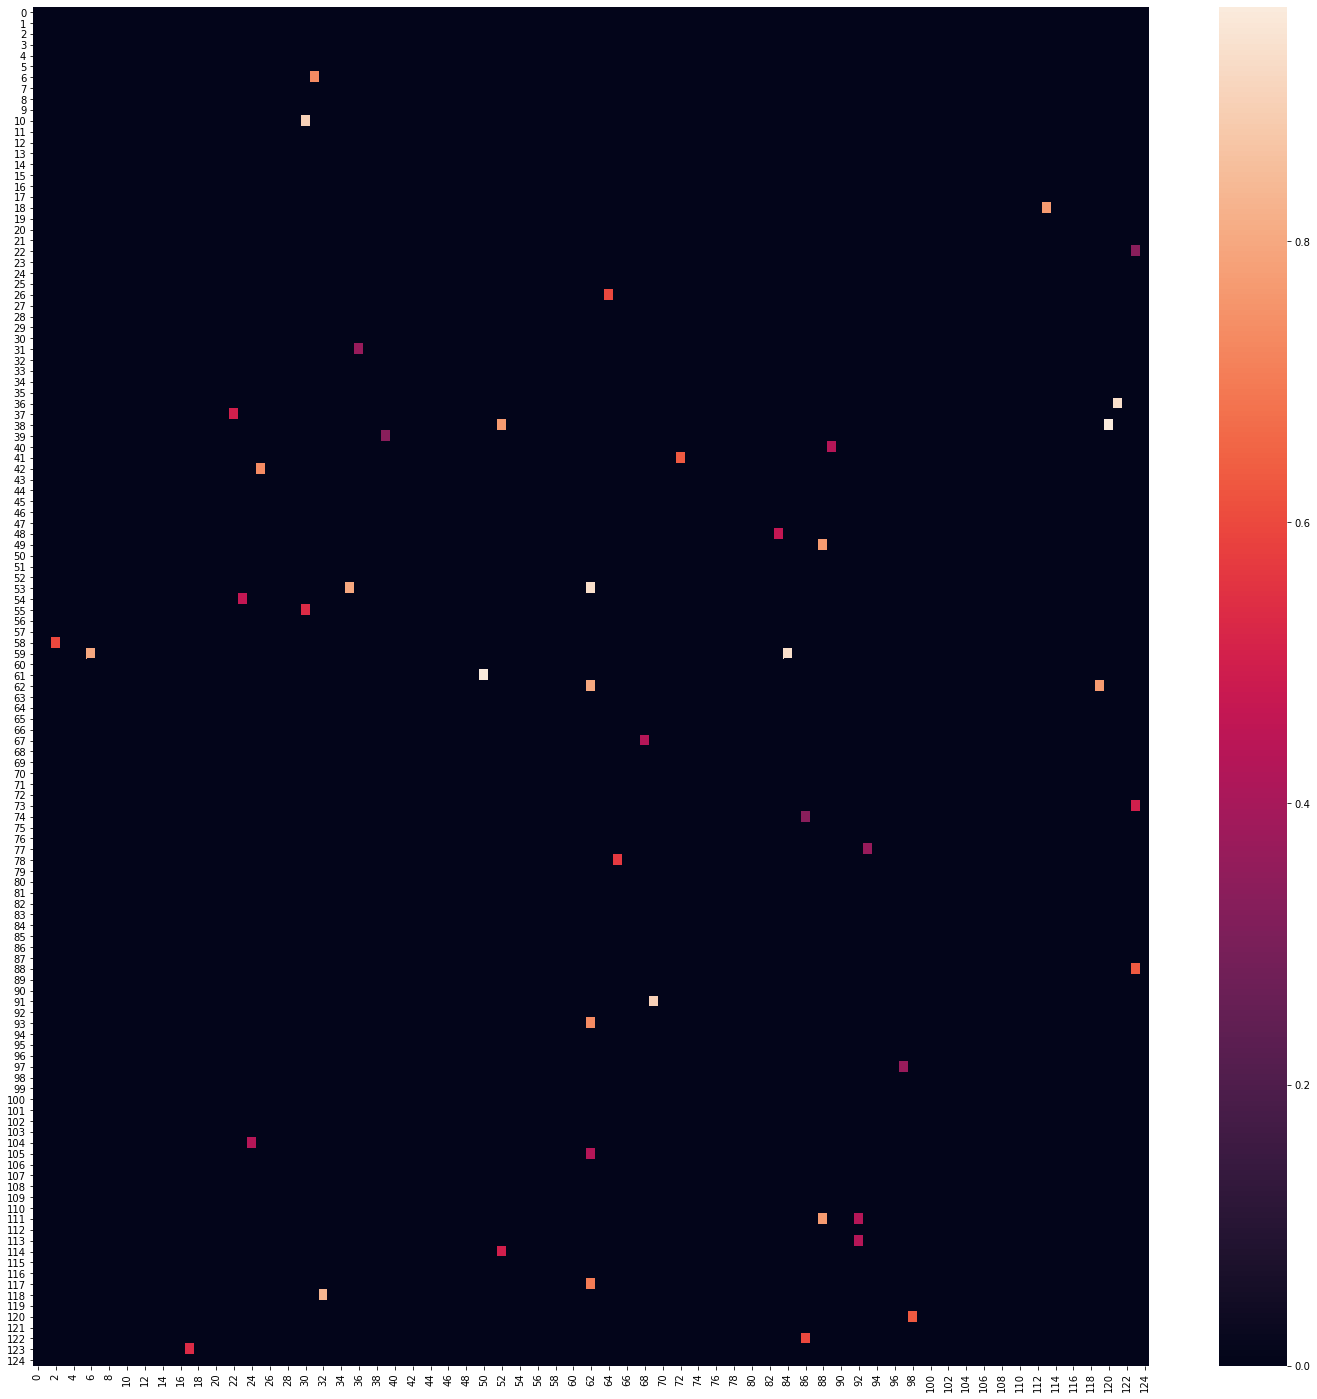

In [3]:
plt.figure(figsize=(25,25))
heat_map = sns.heatmap(Perf/15)

In [34]:
import random
n = len(np.arange(0, 1, 0.05))
X_controller = random.randint(0, n**24)
X_controller
#print(n)

13294579551095267387971857432949

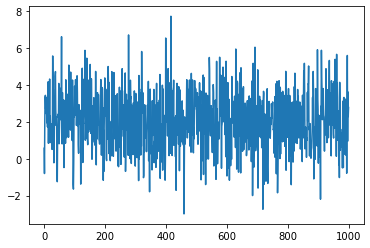

In [41]:
p = 1.5 * np.random.randn(1000) + 2 
plt.plot(p)

0.1515872813268513

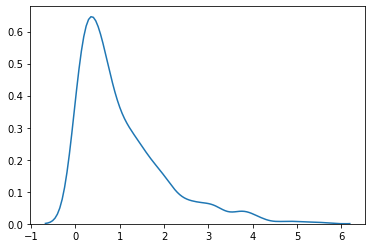

In [47]:
sns.distplot(np.random.exponential(size=1000), hist=False)
p = np.random.exponential(size=1000)
p[50]

In [57]:
a = np.zeros(6)
for j in range(6):
        for i in range(1000):
            a[j] += np.random.randint(0, 2) / 1000
            if(j < 10):
                print(a[j])
a

0.001
0.001
0.002
0.002
0.003
0.004
0.004
0.004
0.005
0.005
0.005
0.005
0.005
0.006
0.006
0.006
0.007
0.007
0.008
0.009000000000000001
0.010000000000000002
0.011000000000000003
0.011000000000000003
0.011000000000000003
0.011000000000000003
0.011000000000000003
0.012000000000000004
0.012000000000000004
0.012000000000000004
0.012000000000000004
0.012000000000000004
0.013000000000000005
0.013000000000000005
0.013000000000000005
0.014000000000000005
0.014000000000000005
0.014000000000000005
0.015000000000000006
0.016000000000000007
0.017000000000000008
0.017000000000000008
0.01800000000000001
0.01900000000000001
0.02000000000000001
0.02100000000000001
0.022000000000000013
0.022000000000000013
0.022000000000000013
0.023000000000000013
0.024000000000000014
0.024000000000000014
0.025000000000000015
0.026000000000000016
0.026000000000000016
0.027000000000000017
0.028000000000000018
0.028000000000000018
0.02900000000000002
0.03000000000000002
0.03100000000000002
0.03100000000000002
0.0310000000

0.2890000000000002
0.2890000000000002
0.2900000000000002
0.2910000000000002
0.2910000000000002
0.2920000000000002
0.2920000000000002
0.2920000000000002
0.2920000000000002
0.2920000000000002
0.2930000000000002
0.2940000000000002
0.2940000000000002
0.2950000000000002
0.2950000000000002
0.2950000000000002
0.2950000000000002
0.2950000000000002
0.2950000000000002
0.2960000000000002
0.2970000000000002
0.2980000000000002
0.2990000000000002
0.3000000000000002
0.3010000000000002
0.3020000000000002
0.3020000000000002
0.3020000000000002
0.3030000000000002
0.3040000000000002
0.3050000000000002
0.3060000000000002
0.3060000000000002
0.3060000000000002
0.3070000000000002
0.3070000000000002
0.3070000000000002
0.3080000000000002
0.3090000000000002
0.3090000000000002
0.3090000000000002
0.3090000000000002
0.3090000000000002
0.3090000000000002
0.3100000000000002
0.3100000000000002
0.3100000000000002
0.3110000000000002
0.3120000000000002
0.3120000000000002
0.3120000000000002
0.3120000000000002
0.3120000000

0.47300000000000036
0.47300000000000036
0.47400000000000037
0.47400000000000037
0.47500000000000037
0.47600000000000037
0.47700000000000037
0.47800000000000037
0.47900000000000037
0.47900000000000037
0.48000000000000037
0.48000000000000037
0.48000000000000037
0.48100000000000037
0.48100000000000037
0.48100000000000037
0.48100000000000037
0.48100000000000037
0.48100000000000037
0.48100000000000037
0.4820000000000004
0.4820000000000004
0.4830000000000004
0.4840000000000004
0.4840000000000004
0.4850000000000004
0.4860000000000004
0.4860000000000004
0.4870000000000004
0.4880000000000004
0.4880000000000004
0.4890000000000004
0.4890000000000004
0.4900000000000004
0.4910000000000004
0.4920000000000004
0.4920000000000004
0.4920000000000004
0.4920000000000004
0.4930000000000004
0.4940000000000004
0.4940000000000004
0.4940000000000004
0.4940000000000004
0.4940000000000004
0.4940000000000004
0.4950000000000004
0.4950000000000004
0.4960000000000004
0.4970000000000004
0.4970000000000004
0.498000000

0.20600000000000016
0.20600000000000016
0.20700000000000016
0.20800000000000016
0.20800000000000016
0.20800000000000016
0.20800000000000016
0.20800000000000016
0.20900000000000016
0.21000000000000016
0.21000000000000016
0.21100000000000016
0.21200000000000016
0.21200000000000016
0.21200000000000016
0.21200000000000016
0.21200000000000016
0.21200000000000016
0.21200000000000016
0.21200000000000016
0.21300000000000016
0.21300000000000016
0.21300000000000016
0.21400000000000016
0.21500000000000016
0.21500000000000016
0.21500000000000016
0.21500000000000016
0.21600000000000016
0.21700000000000016
0.21700000000000016
0.21800000000000017
0.21900000000000017
0.22000000000000017
0.22000000000000017
0.22000000000000017
0.22100000000000017
0.22100000000000017
0.22100000000000017
0.22200000000000017
0.22200000000000017
0.22200000000000017
0.22300000000000017
0.22300000000000017
0.22400000000000017
0.22400000000000017
0.22500000000000017
0.22600000000000017
0.22600000000000017
0.22600000000000017


0.4830000000000004
0.4830000000000004
0.4830000000000004
0.4830000000000004
0.4830000000000004
0.4840000000000004
0.4840000000000004
0.4850000000000004
0.4860000000000004
0.4870000000000004
0.4880000000000004
0.4890000000000004
0.4900000000000004
0.4900000000000004
0.4910000000000004
0.4910000000000004
0.4910000000000004
0.4920000000000004
0.4920000000000004
0.4920000000000004
0.4920000000000004
0.4920000000000004
0.4930000000000004
0.4940000000000004
0.4940000000000004
0.4950000000000004
0.4950000000000004
0.4960000000000004
0.4960000000000004
0.4970000000000004
0.4980000000000004
0.4980000000000004
0.4980000000000004
0.4980000000000004
0.4980000000000004
0.4980000000000004
0.4990000000000004
0.5000000000000003
0.5000000000000003
0.5000000000000003
0.5010000000000003
0.5020000000000003
0.5030000000000003


array([0.513, 0.504, 0.505, 0.536, 0.499, 0.503])

In [134]:

on_ground = np.zeros((1000,6))
for i in range(6):
    r = np.random.choice(np.arange(0, 3, 0.5))
    k = np.random.choice(np.arange(0, 1, 0.5))
    p = np.random.exponential(size=1000)   #exponential distribution
    p_norm = k * np.random.randn(1000) + r
    for j in range(1000):
        r = np.random.choice(np.arange(0, 1, 0.5))
            #on_ground[j][i] = np.random.choice(contact, 1, replace=True, p = [0.05, 0.95])
        if(p[j] > p_norm[j]):
            on_ground[j][i] = 1
            #print( on_ground[j][i])
            print('OKOKOKOK')
       
        else :
            on_ground[j][i] = 0
            print('OK')
#print(p)


OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
O

OKOKOKOK
OKOKOKOK
OK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OK
OK
OKOKOKOK
OKOKOKOK
OK
OKOKOKOK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OK
OK
OKOKOKOK
OKOKOKOK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OK
OK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OK
OK
OKOKOKOK
OKOKOKOK
OK
OK
OK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OK
OK
OK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OK
OKOKOKOK
OK
OKOKOKOK
OK
OK
OKOKOKOK
O

OK
OK
OKOKOKOK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OK
OK
OK
OKOKOKOK
OK
OK
OKOKOKOK
OK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OK
OKOKOKOK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OK
OK
OK
OK
OK
OKOKOKOK
OK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OK
OK
OK
OK
OK
OK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OK
OKOKOKOK
OK
OK
OK
OK
OKOKOKOK
OKOKOKOK
OK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OK
OKOKOKOK
OK
OKOKOKOK
OK
OKOKOKOK
OK
OK
OK
OK
OK
OK
OK
OKOKOKOK
OK
OK
OK
OK
OKOKOKOK
OKOKOKOK
OK
OK
OK
OK
OKOKOKOK
OKOKOKOK
OK
OK
OK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OK
OK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OK
OKOKOKOK
OK
OK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OK
OK
OKOKOKOK
OK
OK
OK
OK
OKOKOKOK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OKOKOKOK
OK
OK
OK
OK
OK
OK
OKOKOKOK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OK
OK
OKOKOKOK
OKOKOKOK
OK
OKOKOKOK
OK
OK
OK
OKOKOKOK
OK
OK
OK
OK
OK
OKOKOKOK
OKOKOKOK
OK
OK
OK
OK
OKOKOKOK
OK
OKOKOKOK
OKOKOKOK
OKOK

In [137]:
a = np.zeros(6)
for j in range(6):
        for i in range(1000):
            #print(on_ground[i][j])
            a[j] += on_ground[i][j]
            if(i > 990):
                print(a[j])
        print('OK')
a /= 1000
print(a)

992.0
993.0
994.0
995.0
996.0
997.0
998.0
999.0
1000.0
OK
606.0
607.0
607.0
608.0
609.0
610.0
610.0
610.0
610.0
OK
140.0
141.0
141.0
141.0
141.0
141.0
141.0
141.0
141.0
OK
426.0
426.0
426.0
426.0
426.0
426.0
426.0
426.0
426.0
OK
429.0
429.0
430.0
431.0
431.0
431.0
431.0
431.0
431.0
OK
361.0
362.0
362.0
362.0
362.0
362.0
362.0
362.0
362.0
OK
[1.    0.61  0.141 0.426 0.431 0.362]


In [190]:
math.modf(10 * 5)[1]

50.0